**Github repository cloning**

In [1]:
! git clone https://github.com/Amiable-Syed/datasetAssignment3.git

Cloning into 'datasetAssignment3'...
remote: Enumerating objects: 24312, done.
remote: Total 24312 (delta 0), reused 0 (delta 0), pack-reused 24312
Receiving objects: 100% (24312/24312), 342.22 MiB | 37.46 MiB/s, done.
Checking out files: 100% (24335/24335), done.


**Imports of different packages**

In [2]:
import os, shutil
import matplotlib.pyplot as plt
from tensorflow.keras import layers, optimizers
from tensorflow.keras.models import Sequential, load_model
import cv2
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [3]:
##Help taken from classfellow (Saqib Naseeb)

**Get Base Directory**

**join paths with base directory**

In [4]:
root_dir = os.getcwd()
buildings_dir=root_dir+"/datasetAssignment3/seg_train/seg_train/buildings"
forest_dir=root_dir+"/datasetAssignment3/seg_train/seg_train/forest"
glacier_dir = root_dir+"/datasetAssignment3/seg_train/seg_train/glacier"
mountain_dir = root_dir+"/datasetAssignment3/seg_train/seg_train/mountain"
sea_dir = root_dir+"/datasetAssignment3/seg_train/seg_train/sea"
street_dir = root_dir+"/datasetAssignment3/seg_train/seg_train/street"

**Get image file name**

In [5]:
build_imgs = os.listdir(buildings_dir)
forest_imgs = os.listdir(forest_dir)
gla_imgs = os.listdir(glacier_dir)
mount_imgs = os.listdir(mountain_dir)
sea_imgs = os.listdir(sea_dir)
street_imgs = os.listdir(street_dir)

In [6]:
def readData(X,labels,base_dir,filesname,label):
  for imgFile in filesname:
    imagePath = os.path.join(base_dir,imgFile)
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (210, 210))
    X.append(image)
    labels.append(label)


Reading Training Data

In [7]:
X_train=[]
y_train=[]
readData(X_train,y_train,buildings_dir,build_imgs,"Buildings")
readData(X_train,y_train,forest_dir,forest_imgs,"Forest")
readData(X_train,y_train,glacier_dir,gla_imgs,"Glacier")
readData(X_train,y_train,mountain_dir,mount_imgs,"Mountain")
readData(X_train,y_train,sea_dir,sea_imgs,"Sea")
readData(X_train,y_train,street_dir,street_imgs,"Street")

Reading Test Data

In [8]:
buildings_test_dir=root_dir+"/datasetAssignment3/seg_test/seg_test/buildings"
forest_test_dir=root_dir+"/datasetAssignment3/seg_test/seg_test/forest"
glacier_test_dir = root_dir+"/datasetAssignment3/seg_test/seg_test/glacier"
mountain_test_dir = root_dir+"/datasetAssignment3/seg_test/seg_test/mountain"
sea_test_dir = root_dir+"/datasetAssignment3/seg_test/seg_test/sea"
street_test_dir = root_dir+"/datasetAssignment3/seg_test/seg_test/street"

In [9]:
build_imgs = os.listdir(buildings_test_dir)
forest_imgs = os.listdir(forest_test_dir)
gla_imgs = os.listdir(glacier_test_dir)
mount_imgs = os.listdir(mountain_test_dir)
sea_imgs = os.listdir(sea_test_dir)
street_imgs = os.listdir(street_test_dir)

In [10]:
X_test=[]
y_test=[]
readData(X_test,y_test,buildings_test_dir,build_imgs,"Buildings")
readData(X_test,y_test,forest_test_dir,forest_imgs,"Forest")
readData(X_test,y_test,glacier_test_dir,gla_imgs,"Glacier")
readData(X_test,y_test,mountain_test_dir,mount_imgs,"Mountain")
readData(X_test,y_test,sea_test_dir,sea_imgs,"Sea")
readData(X_test,y_test,street_test_dir,street_imgs,"Street")

In [11]:
lb = preprocessing.LabelBinarizer()
labels = lb.fit_transform(y_train)
X_train=np.array(X_train,dtype="float32")
y_train=np.array(labels)

# flabels = np.flatten(labels)
print("X_train shape",X_train.shape)
# print("f la shape",flabels)
print("y_train labels shape:",y_train.shape)


X_train shape (14034, 210, 210, 3)
y_train labels shape: (14034, 6)


In [12]:
lb = preprocessing.LabelBinarizer()
labels = lb.fit_transform(y_test)
X_test=np.array(X_test,dtype="float32")
y_test=np.array(labels)

# flabels = np.flatten(labels)
print("X_test shape",X_test.shape)
# print("f la shape",flabels)
print("y_test labels shape:",y_test.shape)


X_test shape (3000, 210, 210, 3)
y_test labels shape: (3000, 6)


In [18]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(210, 210, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(6,activation='softmax'))


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 208, 208, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 206, 206, 64)      18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 204, 204, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 102, 102, 128)     0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 100, 100, 256)     295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 640000)           

##Stochastic Gradient Decent with learning rate##

In [20]:
sgd = optimizers.SGD(lr=0.0001, decay=1e-3, momentum=0.5)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['acc'])

In [21]:
print("Y_Train shape:",y_train.shape)
print("X_Train shape:",X_train.shape)

Y_Train shape: (14034, 6)
X_Train shape: (14034, 210, 210, 3)


##Model training with validation split of 10%##

In [ ]:
history = model.fit(X_train,y_train,epochs=80,batch_size=64, verbose=1,validation_split=0.10)

Epoch 1/80
198/198 [==============================] - 71s 317ms/step - loss: 11.5066 - acc: 0.1928 - val_loss: 1.8037 - val_acc: 0.0000e+00
Epoch 2/80
198/198 [==============================] - 60s 305ms/step - loss: 1.7472 - acc: 0.1765 - val_loss: 1.8710 - val_acc: 7.1225e-04
Epoch 3/80
198/198 [==============================] - 60s 305ms/step - loss: 1.6916 - acc: 0.2438 - val_loss: 1.8814 - val_acc: 0.0050
Epoch 4/80
198/198 [==============================] - 60s 305ms/step - loss: 1.6393 - acc: 0.2379 - val_loss: 1.9685 - val_acc: 0.0392
Epoch 5/80
198/198 [==============================] - 60s 305ms/step - loss: 1.6005 - acc: 0.2754 - val_loss: 1.7141 - val_acc: 0.4209
Epoch 6/80
198/198 [==============================] - 60s 305ms/step - loss: 1.5741 - acc: 0.2743 - val_loss: 1.6728 - val_acc: 0.4836
Epoch 7/80
198/198 [==============================] - 60s 305ms/step - loss: 1.5539 - acc: 0.2888 - val_loss: 1.7200 - val_acc: 0.4972
Epoch 8/80
198/198 [==========================

In [ ]:
 model.evaluate(X_test,y_test,batch_size=128)
 y_pred = model.predict(X_test)

886/886 [==============================] - 2s 2ms/sample - loss: 0.4600 - acc: 0.8533


In [ ]:
print("Y_Test shape:",y_test.shape)
print("Y_pred shape:",y_pred.shape)
y_test1=np.argmax(y_test, axis=1)
y_pred1 = np.argmax(y_pred, axis=1)
confusion_matrix = confusion_matrix(y_test1, y_pred1)

Y_Test shape: (886, 4)
Y_pred shape: (886, 4)


In [ ]:
labels.shape

(4428, 4)

[[171  12   4   9]
 [  7 241  14   1]
 [  5  38 151  11]
 [  5  14  10 193]]


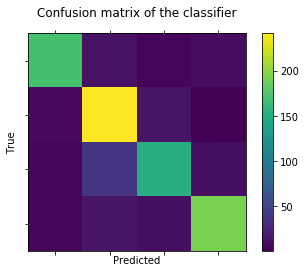

In [ ]:
print(confusion_matrix)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion_matrix)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##Save model##

In [ ]:
model.save("test_accurracy 85.h5")

##Graphs of loss and accuracy##

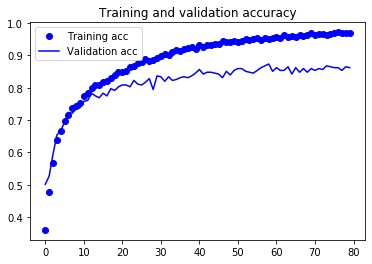

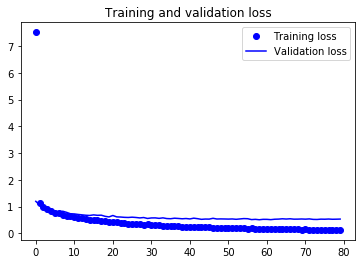

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()